# KJMA Example

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as cls
from mpl_toolkits.axes_grid1 import make_axes_locatable, host_subplot
import mpl_toolkits.axisartist as AA

## Define the KJMA Model

In [2]:
def repair_frac(t, tau, m):
    return 1 - np.exp(- (t / tau)**m)

## Temporal Evolution With Different Parameters

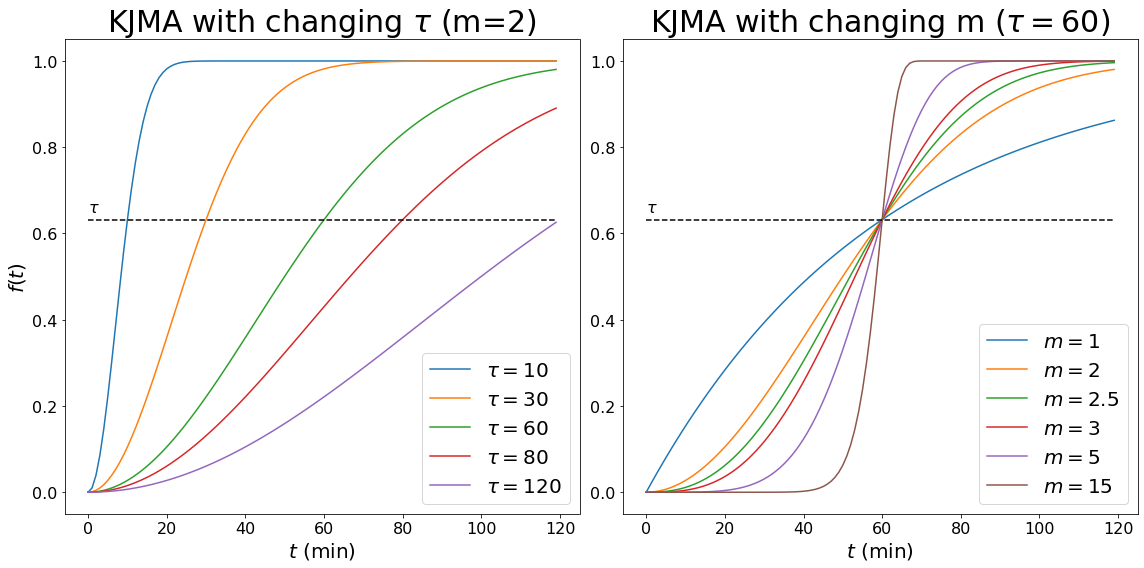

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot([repair_frac(t, 10, 2) for t in np.arange(120)], label=r'$\tau=10$')
ax[0].plot([repair_frac(t, 30, 2) for t in np.arange(120)], label=r'$\tau=30$')
ax[0].plot([repair_frac(t, 60, 2) for t in np.arange(120)], label=r'$\tau=60$')
ax[0].plot([repair_frac(t, 80, 2) for t in np.arange(120)], label=r'$\tau=80$')
ax[0].plot([repair_frac(t, 120, 2) for t in np.arange(120)], label=r'$\tau=120$')
ax[0].plot(1 - np.ones(120) * 1 / np.e, 'k--')
ax[0].text(0, .65, r'$\tau$', fontsize=16)
ax[0].legend(loc='lower right', fontsize=20)

ax[1].plot([repair_frac(t, 60, 1) for t in range(120)], label=r'$m=1$')
ax[1].plot([repair_frac(t, 60, 2) for t in range(120)], label=r'$m=2$')
ax[1].plot([repair_frac(t, 60, 2.5) for t in range(120)], label=r'$m=2.5$')
ax[1].plot([repair_frac(t, 60, 3) for t in range(120)], label=r'$m=3$')
ax[1].plot([repair_frac(t, 60, 5) for t in range(120)], label=r'$m=5$')
ax[1].plot([repair_frac(t, 60, 15) for t in range(120)], label=r'$m=15$')
ax[1].legend(loc='lower right', fontsize=20)
ax[1].plot(1 - np.ones(120) * 1 / np.e, 'k--')
ax[1].text(0, .65, r'$\tau$', fontsize=16)

ax[0].set_ylabel(r'$f(t)$', fontsize=20)
ax[0].set_xlabel('$t$ (min)', fontsize=20)
ax[1].set_xlabel('$t$ (min)', fontsize=20 )
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_title(r'KJMA with changing $\tau$ (m=2)', fontsize=30)
ax[1].set_title(r'KJMA with changing m ($\tau=60$)', fontsize=30)
fig.tight_layout()
plt.savefig('kjma_example.png')

## Temporal Evolution With Different Parameters in Logarithmic Time

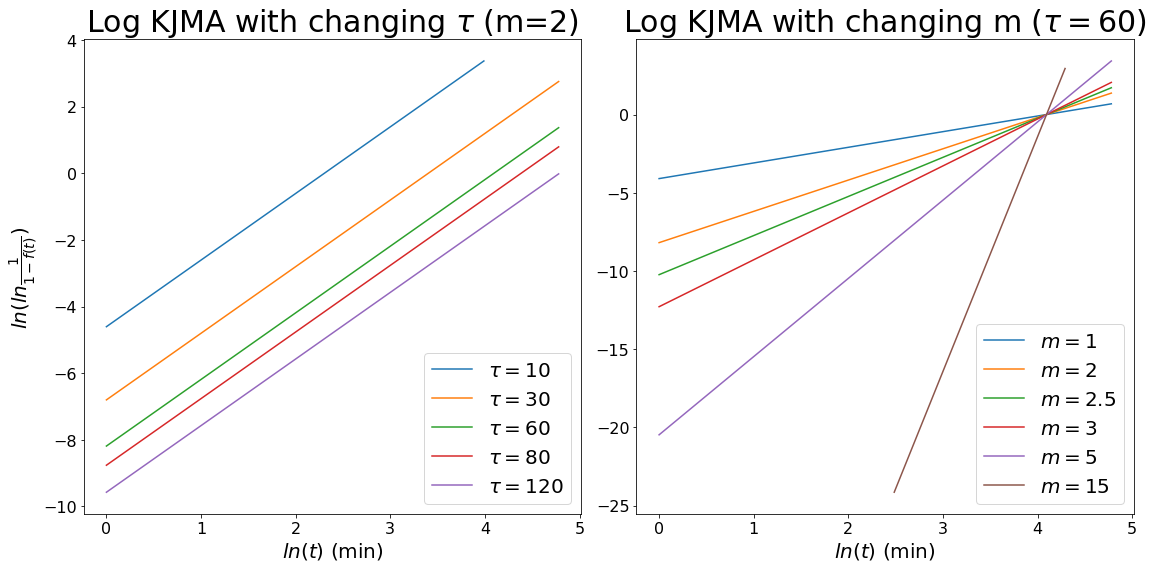

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
x_range = np.log(np.arange(1, 120))
ax[0].plot(
    x_range[x_range < 4], 
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 10, 2) for t in np.arange(1, 120) if np.log(t) < 4])))),
    label=r'$\tau=10$'
)
ax[0].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 30, 2) for t in np.arange(1, 120)])))),
    label=r'$\tau=30$'
)
ax[0].plot(
    x_range, 
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 2) for t in np.arange(1, 120)])))),
    label=r'$\tau=60$'
)
ax[0].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 80, 2) for t in np.arange(1, 120)])))),
    label=r'$\tau=80$'
)
ax[0].plot(
    x_range, 
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 120, 2) for t in np.arange(1, 120)])))), 
    label=r'$\tau=120$'
)
ax[0].legend(loc='lower right', fontsize=20)

ax[1].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 1) for t in np.arange(1, 120)])))),
    label=r'$m=1$'
)
ax[1].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 2) for t in np.arange(1, 120)])))),
    label=r'$m=2$'
)
ax[1].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 2.5) for t in np.arange(1, 120)])))),
    label=r'$m=2.5$'
)
ax[1].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 3) for t in np.arange(1, 120)])))),
    label=r'$m=3$'
)
ax[1].plot(
    x_range,
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 5) for t in np.arange(1, 120)])))),
    label=r'$m=5$'
)
ax[1].plot(
    x_range[np.logical_and(x_range > 2.4, x_range < 4.3)],
    np.log(np.log(1. / (1. - np.asarray([repair_frac(t, 60, 15) for t in np.arange(11, 120) if 2.4 < np.log(t) < 4.3])))),
    label=r'$m=15$'
)
ax[1].legend(loc='lower right', fontsize=20)

ax[0].set_ylabel(r'$ln(ln \frac{1}{1 - f(t)})$', fontsize=20)
ax[0].set_xlabel(r'$ln(t)$ (min)', fontsize=20)
ax[1].set_xlabel(r'$ln(t)$ (min)', fontsize=20 )
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_title(r'Log KJMA with changing $\tau$ (m=2)', fontsize=30)
ax[1].set_title(r'Log KJMA with changing m ($\tau=60$)', fontsize=30)
fig.tight_layout()
plt.savefig('log_kjma_example.png')